,id,job,area,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime,product
0,1,vv,c,50876.0,13.100000,1,9.017895,35,11.738935,49,0.885827,0.492126,0.071100,b
1,2,kd,c,60369.0,18.625000,2,7.766643,59,6.805396,51,0.874016,0.342520,0.400809,c
2,3,pe,c,55126.0,34.766667,1,3.632069,6,13.671772,44,0.944882,0.724409,0.207723,b
3,4,11,c,51690.0,15.808333,1,5.372942,16,4.333286,50,0.889764,0.444882,0.361216,b
4,5,kl,d,28347.0,40.941667,3,3.822477,20,5.967121,38,0.744094,0.661417,0.068033,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,vv,c,51017.0,38.233333,1,5.454545,34,14.013489,41,0.881890,0.744094,0.104838,b
1996,1997,kl,d,26576.0,33.358333,2,3.632069,20,8.380497,38,0.944882,0.877953,0.063851,a
1997,1998,kl,d,28595.0,39.425000,3,7.168218,99,4.626950,36,0.759843,0.744094,0.098703,f
1998,1999,qp,c,67949.0,5.733333,0,8.936292,26,3.281439,46,0.909449,0.598425,0.117803,c


---------------------------------------------------------------------------------------------------------------------------------------------------------------------
Headers = ['id' 'job' 'area' 'income' 'aspect' 'subscriptions' 'dist_healthy'
 'save_rate' 'dist_unhealthy' 'age' 'pop_dense' 'retail_dense' 'crime'
 'product']
output values = ['b' 'c' 'a' 'd' 'f' 'e' 'g']
---------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Data Sets after standardization : 


,id,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime,product,job_11,job_al,job_am,job_ax,job_bf,job_by,job_cv,job_de,job_dz,job_e2,job_f8,job_gj,job_gv,job_kd,job_ke,job_kl,job_kp,job_ks,job_kw,job_mm,job_nb,job_nn,job_ob,job_pe,job_po,job_pq,job_pz,job_qp,job_qw,job_rn,job_sa,job_vv,job_zz,area_a,area_b,area_c,area_d
0,1,-0.607550,-0.664918,-0.208449,9.017895,-0.215764,11.738935,0.854321,0.885827,0.492126,0.071100,b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,0.338053,-0.207748,0.839031,7.766643,0.196869,6.805396,1.394432,0.874016,0.342520,0.400809,c,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,-0.184205,1.127906,-0.208449,3.632069,-0.714362,13.671772,-0.495957,0.944882,0.724409,0.207723,b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,-0.526467,-0.440815,-0.208449,5.372942,-0.542432,4.333286,1.124377,0.889764,0.444882,0.361216,b,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5,-2.851675,1.638861,1.886511,3.822477,-0.473660,5.967121,-2.116291,0.744094,0.661417,0.068033,a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,-0.593504,1.414758,-0.208449,5.454545,-0.232957,14.013489,-1.306124,0.881890,0.744094,0.104838,b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1996,1997,-3.028085,1.011372,0.839031,3.632069,-0.473660,8.380497,-2.116291,0.944882,0.877953,0.063851,a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1997,1998,-2.826971,1.513363,1.886511,7.168218,0.884591,4.626950,-2.656402,0.759843,0.744094,0.098703,f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1998,1999,1.093101,-1.274478,-1.255928,8.936292,-0.370502,3.281439,0.044154,0.909449,0.598425,0.117803,c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


----------------------------------------------------------------------------------------------------------------------------------------------------------------
x_def = Index(['income', 'aspect', 'subscriptions', 'dist_healthy', 'save_rate',
       'dist_unhealthy', 'age', 'pop_dense', 'retail_dense', 'crime', 'job_11',
       'job_al', 'job_am', 'job_ax', 'job_bf', 'job_by', 'job_cv', 'job_de',
       'job_dz', 'job_e2', 'job_f8', 'job_gj', 'job_gv', 'job_kd', 'job_ke',
       'job_kl', 'job_kp', 'job_ks', 'job_kw', 'job_mm', 'job_nb', 'job_nn',
       'job_ob', 'job_pe', 'job_po', 'job_pq', 'job_pz', 'job_qp', 'job_qw',
       'job_rn', 'job_sa', 'job_vv', 'job_zz', 'area_a', 'area_b', 'area_c',
       'area_d'],
      dtype='object')
----------------------------------------------------------------------------------------------------------------------------------------------------------------
y_df =       a  b  c  d  e  f  g
0     0  1  0  0  0  0  0
1     0  0  1  0  0  0  0
2     0

Text(0.5, 13.421126458070283, 'Predicted label')

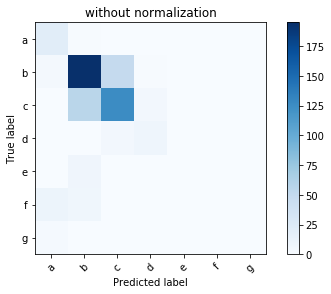

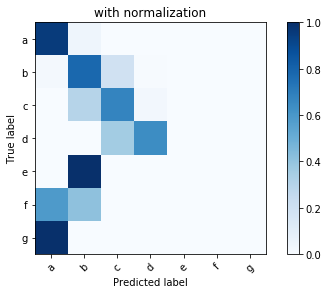

In [74]:
%tensorflow_version 2.x
import os
import requests
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn import metrics


## Getting data from source
df = pd.read_csv("https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv", na_values=['NA', '?'])
display(df)
print("---------------------------------------------------------------------------------------------------------------------------------------------------------------------")
headers = df.columns.values
print(f"Headers = {headers}")
print(f"output values = {df['product'].unique()}")
print("---------------------------------------------------------------------------------------------------------------------------------------------------------------------")


## Create dummies for job
dummies = pd.get_dummies(df['job'], prefix='job')
df = pd.concat([df, dummies], axis=1)
df.drop('job', axis=1, inplace=True)


## Create dummies for area
dummies = pd.get_dummies(df['area'], prefix='area')
df = pd.concat([df, dummies], axis=1)
df.drop('area', axis=1, inplace=True)


## Missing values for income
med = df['income'].median()
df['income'] = df['income'].fillna(med)


## PreProcessing on data set
df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['age'] = zscore(df['age'])
df['subscriptions'] = zscore(df['subscriptions'])
print("----------------------------------------------------------------------------------------------------------------------------------------------------------------")
print("Data Sets after standardization : ")
display(df)


## Data Sets
x_df = df.columns.drop('id').drop('product')
print("----------------------------------------------------------------------------------------------------------------------------------------------------------------")
print(f"x_def = {x_df}")
y_df = pd.get_dummies(df['product'])
x = df[x_df].values          # puting feature values in the x 
y = y_df.values
print("----------------------------------------------------------------------------------------------------------------------------------------------------------------")
print(f"y_df = {y_df}")
print(f"y_df.columns = {y_df.columns}")
print(f"y_df.values = {y_df.values}")
print("----------------------------------------------------------------------------------------------------------------------------------------------------------------")
print(f"x = {x}")
print("----------------------------------------------------------------------------------------------------------------------------------------------------------------")
print(f"y = {y}")
print("----------------------------------------------------------------------------------------------------------------------------------------------------------------")


## Split training data into test and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


## Building Nueral Network
model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='relu', kernel_initializer='random_normal'))
model.add(Dense(50, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(25, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(y.shape[1], activation='softmax', kernel_initializer='random_normal'))


## Training Process and EARLYSTOPPING PROCESS
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)
model.fit(x_train, y_train, validation_data=(x_test, y_test), verbose=1, epochs=1000, callbacks=[monitor])


## Calculating accuracy
print("----------------------------------------------------------------------------------------------------------------------------------------------------------------")
y_pred = model.predict(x_test)
predict_list = np.argmax(y_pred, axis=1)
test_list = np.argmax(y_test, axis=1)          # this is a list each member of is equivalent to index of the maximum feature
print(f"y_pred = {y_pred}")
print("----------------------------------------------------------------------------------------------------------------------------------------------------------------")
print(f"predict_list = {predict_list}")
print("----------------------------------------------------------------------------------------------------------------------------------------------------------------")
print(f"test_list = {test_list}")
print("----------------------------------------------------------------------------------------------------------------------------------------------------------------")

accuracy = metrics.accuracy_score(test_list, predict_list)
print(f"accuracy = {accuracy}")
print("----------------------------------------------------------------------------------------------------------------------------------------------------------------")

log_loss = metrics.log_loss(y_test, y_pred)
print(f"log_loss = {log_loss}")
print("----------------------------------------------------------------------------------------------------------------------------------------------------------------")


## Confusing matrix
CM = metrics.confusion_matrix(test_list, predict_list)
print('Confusion matrix, without normalization')
print(f"CM =")
print(CM)
print("----------------------------------------------------------------------------------------------------------------------------------------------------------------")
print('Confusion matrix, with normalization')
np.set_printoptions(precision=2)          # Set two digit for decimal
CM_normalized = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
print(f"CM_normalized = ")
print(CM_normalized)
print("----------------------------------------------------------------------------------------------------------------------------------------------------------------")


## ploting confusing matrix
# without normalization
plt.figure()
plt.imshow(CM, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('without normalization')
plt.colorbar()
tick_marks = np.arange(len(y_df.columns))
plt.xticks(tick_marks, y_df.columns, rotation=45)
plt.yticks(tick_marks, y_df.columns)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

# with normalization
plt.figure()
plt.imshow(CM_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('with normalization')
plt.colorbar()
tick_marks = np.arange(len(y_df.columns))
plt.xticks(tick_marks, y_df.columns, rotation=45)
plt.yticks(tick_marks, y_df.columns)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')